Name: plot_precip.ipynb

Author: Robert M. Frost

NOAA Global Systems Laboratory

Created: 07 July 2023

Purpose: Plot surface based cape utilizing read_grib from plotting_functions.py

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
import cartopy.crs as ccrs
import cartopy.feature as cpf
import numpy as np
from metpy.plots import ctables
from plotting_functions import read_grib
import geopandas as gpd
import seaborn

Important parameters

In [2]:
# hour of interest
hr = 36
# directory where hrrr grib data are located
dgrib_h = "/scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/2023041900_3km_hrrrphys/2023041900/postprd/"
# directory where rap grib data are located
dgrib_r = "/scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/2023041900_3km_rapphys/2023041900/postprd/"
# natlev or prslev
nat_prs = "natlev"
# message number for total precip accu
mn_precip = 1374
# directory for figure to be output
figdir = "/scratch2/BMC/fv3lam/Robby.Frost/figures/20230419/precip/"

Read in precip

In [3]:
precip_h, lat, lon, valid_date = read_grib(hr, dgrib_h, nat_prs, mn_precip)
precip_r = read_grib(hr, dgrib_r, nat_prs, mn_precip, array_only=True)

Reading in /scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/2023041900_3km_hrrrphys/2023041900/postprd/rrfs.t00z.natlev.f036.rrfs_conuscompact_3km.grib2


Finished reading in Total Precipitation
Reading in /scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/2023041900_3km_rapphys/2023041900/postprd/rrfs.t00z.natlev.f036.rrfs_conuscompact_3km.grib2
Finished reading in Total Precipitation


In [4]:
# plotting setup
rc('font',weight='normal',size=12.5)
# rc('text',usetex='True')
rc('figure',facecolor='white')

Side by side precip plot

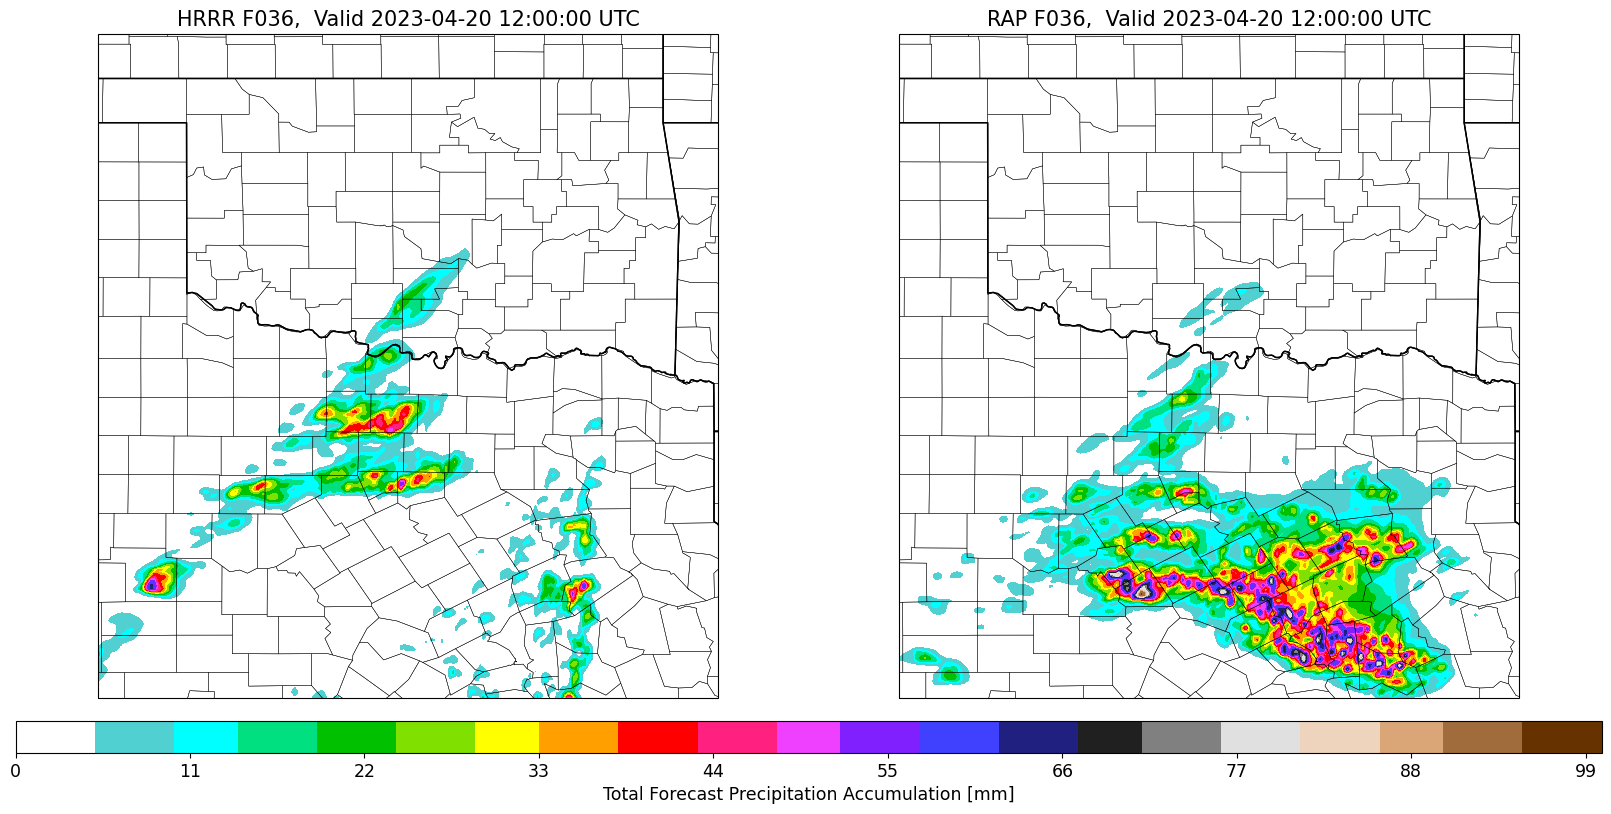

In [8]:
# Define your custom colorbar bounds
cbar_min = 0
cbar_max = 100.1
# levels for sbcape to be plot
clevs = np.arange(cbar_min, cbar_max, 1)
# define color table using metpy colortables
colors = ctables.registry.get_colortable('precipitation')

# create plot
fig, ax = plt.subplots(ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(16,8), constrained_layout=True)

# plot HRRR
c0 = ax[0].contourf(lon, lat, precip_h.values, clevs, 
                    transform=ccrs.PlateCarree(), 
                    cmap=colors)
# plot RAP
c1 = ax[1].contourf(lon, lat, precip_r.values, clevs, 
                    transform=ccrs.PlateCarree(), 
                    cmap=colors)

# mapping
plt_area = [-101, -94, 30, 37.5] # W, E, S, N
for i, iax in enumerate(ax):
    iax.coastlines()
    iax.add_feature(cpf.BORDERS)
    iax.add_feature(cpf.STATES)
    iax.set_extent(plt_area)
    # Load the json file with county coordinates
    geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')
    geoData.plot(ax=iax, color="none", lw=0.3, aspect=1)

# set title
ax[0].set_title(f"HRRR F0{hr},  Valid 2023-04-20 12:00:00 UTC")
ax[1].set_title(f"RAP F0{hr},  Valid 2023-04-20 12:00:00 UTC")

# Add colorbar
cbar = fig.colorbar(c1, ax=ax, orientation='horizontal', extend=True, pad=0.03, aspect=50)
cbar.set_label('Total Forecast Precipitation Accumulation [mm]')

# save and close figure
plt.savefig(f"{figdir}precip_sidebyside_f{hr}.png")
plt.show()
plt.close()

Precip Difference Plot

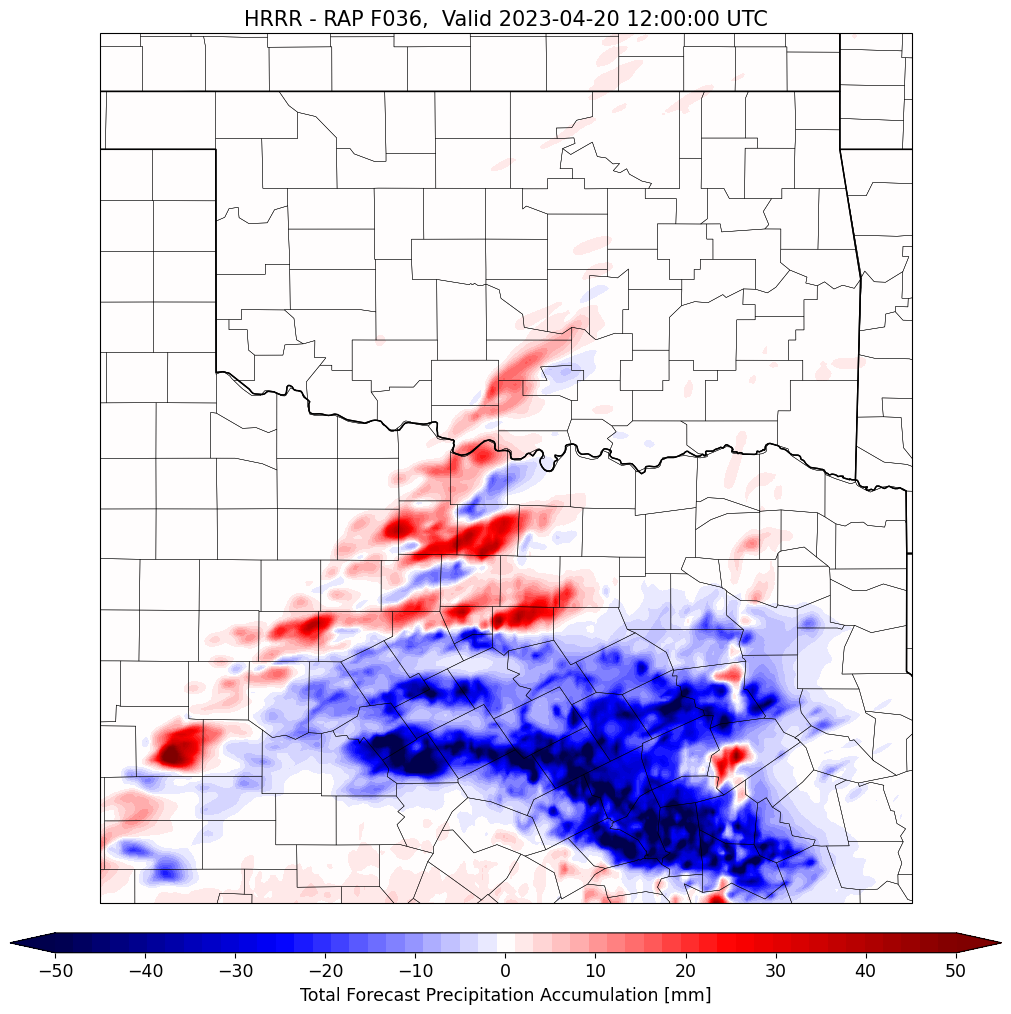

In [6]:
# Define your custom colorbar bounds
cbar_min = -50
cbar_max = 50.1
clevs = np.linspace(cbar_min, cbar_max, 50)
# color palette
colors = seaborn.color_palette("seismic", as_cmap=True)

# create plot
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, 
                       figsize=(10,10), constrained_layout=True)

# plot HRRR - RAP
c0 = ax.contourf(lon, lat, precip_h.values - precip_r.values,
                 clevs, transform=ccrs.PlateCarree(),
                 cmap=colors, extend="both")

# mapping
plt_area = [-101, -94, 30, 37.5] # W, E, S, N
ax.coastlines()
ax.add_feature(cpf.BORDERS)
ax.add_feature(cpf.STATES)
ax.set_extent(plt_area)
# Load the json file with county coordinates
geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')
geoData.plot(ax=ax, color="none", lw=0.3, aspect=1)

# set title
ax.set_title(f"HRRR - RAP F0{hr},  Valid 2023-04-20 12:00:00 UTC")

# Add colorbar
cbar = fig.colorbar(c0, ax=ax, orientation='horizontal', extend=True, pad=0.03, aspect=50)
cbar.set_label('Total Forecast Precipitation Accumulation [mm]')
cbar.set_ticks(np.arange(cbar_min, cbar_max, 10))

# save figure
plt.show()
plt.close()